<a href="https://colab.research.google.com/github/liscolme/EscapeEarth/blob/main/Interns/Elise/OpenAndPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
###################################
!pip install lightkurve
import lightkurve as lk
import numpy as np
import pandas as pd
import glob

In [ ]:
!ls /content/gdrive/My \Drive/EscapeEarthData

#/content/gdrive/My \Drive/EscapeEarthData/Sec14_cleaned/{ticid}/lc.fits
#/content/gdrive/My \Drive/EscapeEarthData/Sec15_cleaned/{ticid}/lc.fits

#/content/gdrive/My \Drive/EscapeEarthData/all_targets_S014_v1.csv

In [ ]:
###################################
# one function to open raw OR cleaned data
## fcn for raw data onlydef open_raw_lc(ticid,sector):
def open_raw_lc(ticid,sector):
  try:
    filename = glob.glob('/content/gdrive/My Drive/EscapeEarthData/Sector_{}_rawdata/*{}-*-s_lc.fits'.format(sector,ticid))
    lc_file = lk.open(filename[0])
    lc = lc_file.PDCSAP_FLUX
  except IndexError:
    lc = "None"
    pass
  return lc

In [ ]:
## fcn for cleaned data only
def open_clean_lc(ticid,sector):
  try:
    lc_file = lk.open('/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits'.format(sector, ticid))
    lc = lc_file.FLUX
  except FileNotFoundError:
    lc = "None"
    pass
  return lc
##combined function for cleaned or raw
def open_lc(ticid,sector,stage):
  if stage == 'raw':
    lc = open_raw_lc(ticid,sector)
  elif stage == 'clean':
    lc = open_clean_lc(ticid,sector)
  else:
    print('stage parameter not understood; valid entries include: "raw" or "clean"')
  return lc
#################################
# open dataframe of target info to get tic ids
target14_list =  pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv',skiprows=5)
target15_list = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S015_v1.csv',skiprows=5)
target15_list
#####################################
# each sector's list of tic ids
raw15_tics = [10757120, 10759029, 10849428, 10856385, 10984531]
raw14_tics = [7582633, 7582634, 7583285, 7618785, 7620704]
clean15_tics = target15_list['TICID'].to_numpy()
clean14_tics = target14_list['TICID'].to_numpy()
# open one target's lightcurve
lc = open_lc(raw14_tics[0],14,'clean')
lc

In [ ]:
def plot(ticid,sector):
  try:
    filename = glob.glob('/content/gdrive/My Drive/EscapeEarthData/Sector_{}_rawdata/*{}-*-s_lc.fits'.format(sector,ticid))
    lc_file = lk.open(filename[0])
    lc = lc_file.PDCSAP_FLUX
  except IndexError:
    lc = "None"
    pass
  return lc.plot()

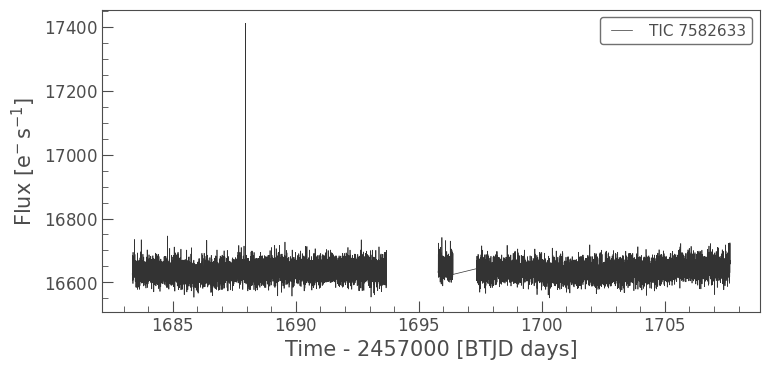

In [ ]:
plot(7582633,14)

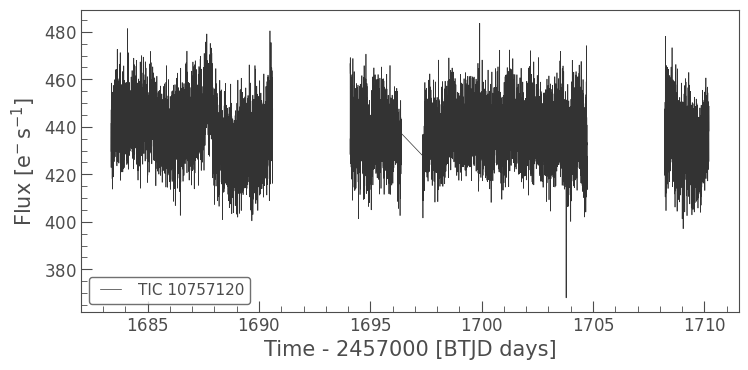

In [ ]:
plot(10757120,15)